In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [9]:
cars=pd.read_csv("ToyotaCorolla (1).csv", encoding=(' ISO-8859-1 '))

In [10]:
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
cars.shape

(1436, 38)

In [12]:
cars=cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
]
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
df=cars.rename({'Age_08_04':'age','Quarterly_Tax':'tax'},axis=1)
df

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
df.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
tax       0
Weight    0
dtype: int64

In [15]:
df.describe()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# correlation matrix

In [16]:
df.corr()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [17]:
# checking duplicates in dataset

df[df.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [19]:
df=df.drop_duplicates().reset_index(drop=True)
df

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


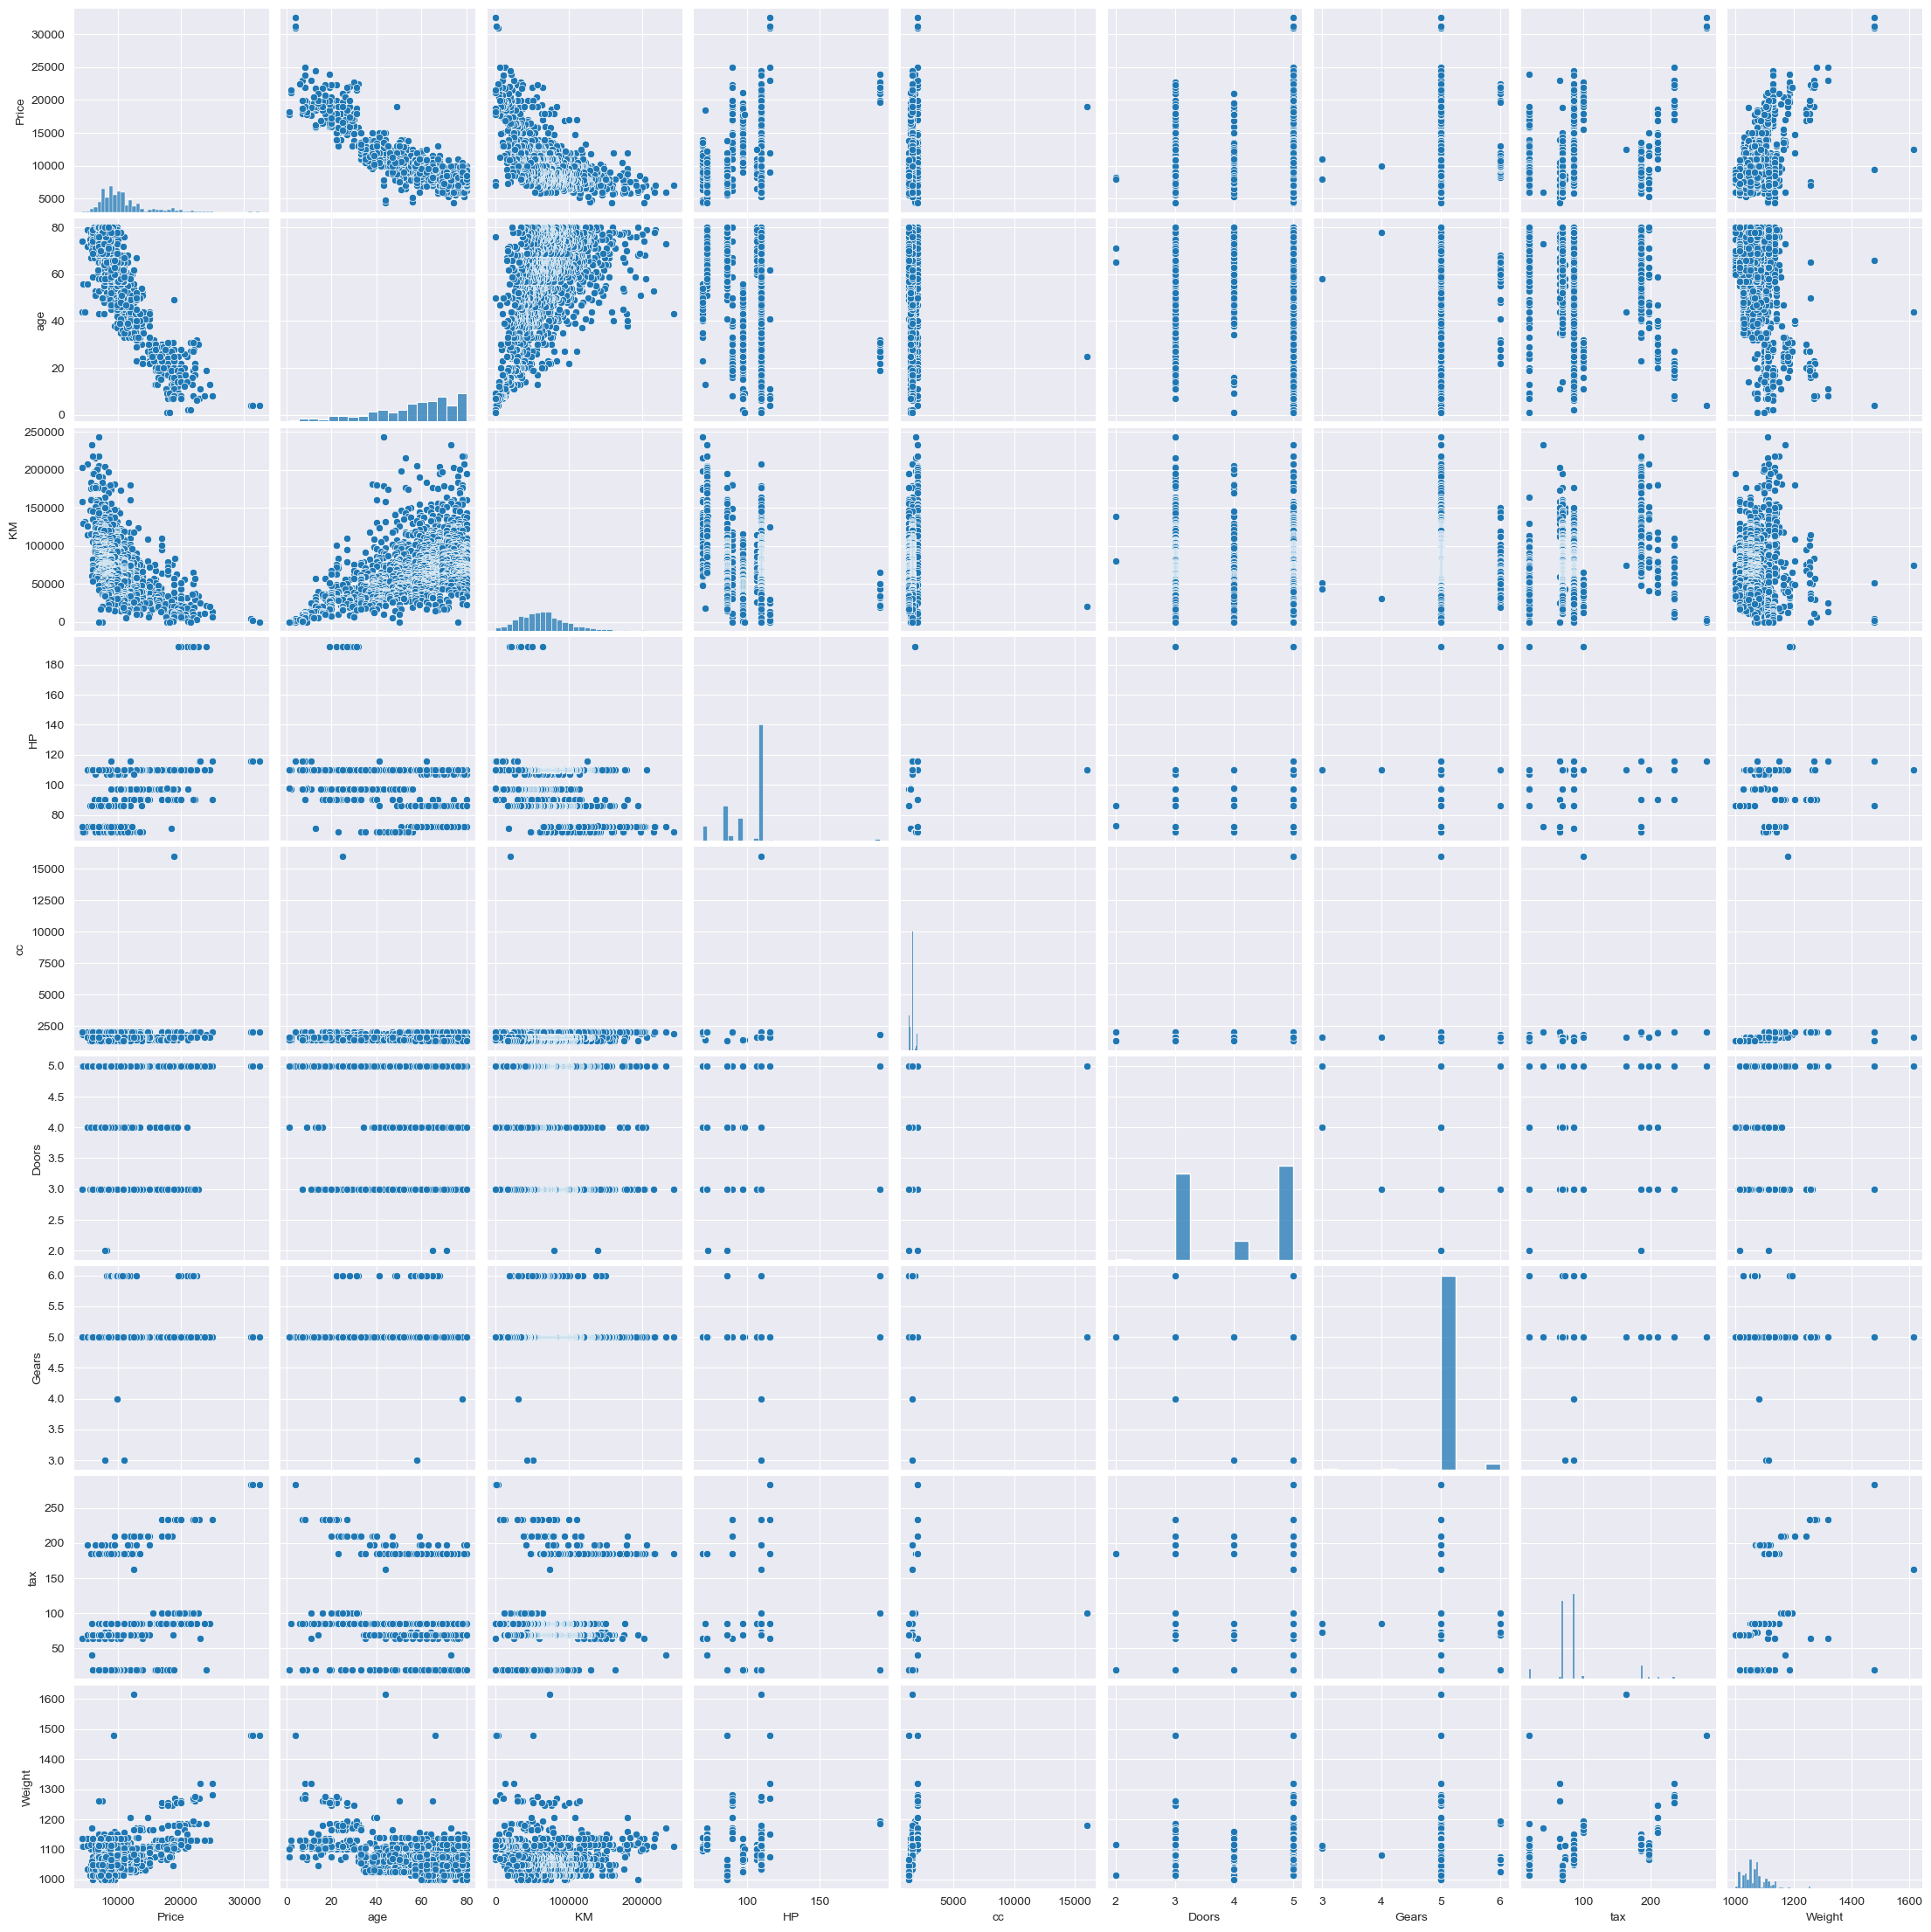

In [21]:
## Pair Plot

sns.set_style(style='darkgrid')
sns.pairplot(df)

In [22]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=df).fit()
model

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:09:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
tax             3.858805
Weight         16.855470
dtype: float64

In [25]:
# checking(finding) R-square and Adjusted R-square

model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [26]:
## checking(finding) t-values and p-values

model.tvalues, model.pvalues

(Intercept    -3.875273
 age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 tax           2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 tax           3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

# Model Validation Techniques

# By using 1) Collinearity Check 2) Residual Check

In [27]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
# take all independent variables alternatively and put at a place of (depenedent ~ independent) and chaeking data

rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~age+KM+HP+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Door=smf.ols('Doors~age+KM+HP+cc+Gears+tax+Weight',data=df).fit().rsquared
vif_Door=1/(1-rsq_Door)

rsq_Gears=smf.ols('Gears~age+KM+HP+cc+Doors+tax+Weight',data=df).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_tax=smf.ols('tax~age+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_WT=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+tax',data=df).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['age','KM','HP','cc','Doors','Gears','tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Door,vif_Gears,vif_tax,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,tax,2.295375
7,Weight,2.487180


In [28]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis by q-q plot

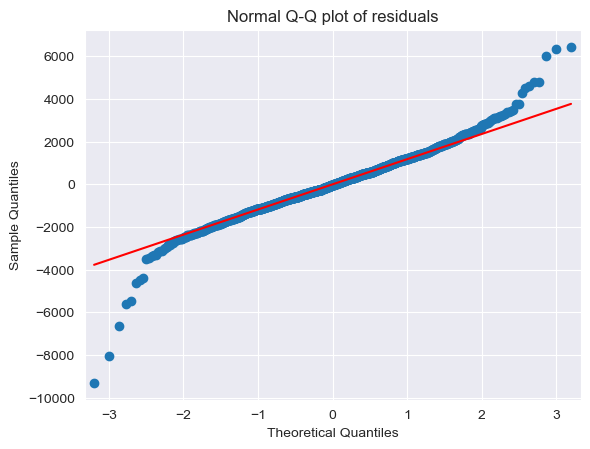

In [29]:
import statsmodels.api as sm
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
# outliar detection from above QQ plot of residuals


list(np.where(model.resid>4000)), list(np.where(model.resid<-4000))

([array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)],
 [array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)])

In [31]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standard_values(vals): 
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

In [32]:
model.fittedvalues, model.resid

(0       16791.958871
 1       16253.800414
 2       16779.635210
 3       16405.789389
 4       16200.217277
             ...     
 1430     8794.255037
 1431     8292.577342
 1432     8455.434402
 1433     8579.222041
 1434    10396.087526
 Length: 1435, dtype: float64,
 0      -3291.958871
 1      -2503.800414
 2      -2829.635210
 3      -1455.789389
 4      -2450.217277
            ...     
 1430   -1294.255037
 1431    2552.422658
 1432      44.565598
 1433   -1329.222041
 1434   -3446.087526
 Length: 1435, dtype: float64)

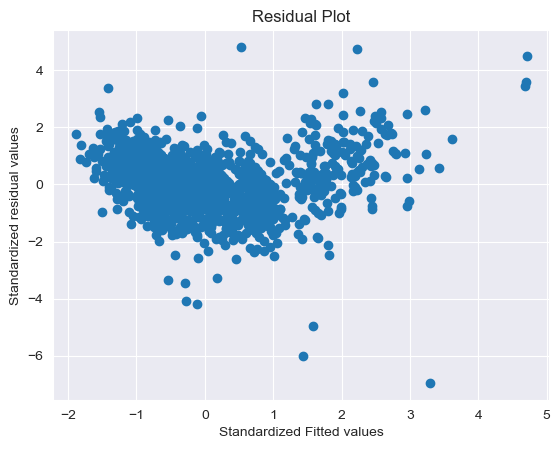

In [33]:
# checking similarity(relationship) by use of scatter plot

plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [34]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    
# exog = x-variable & endog = y-variable

# residual vs regressor

eval_env: 1


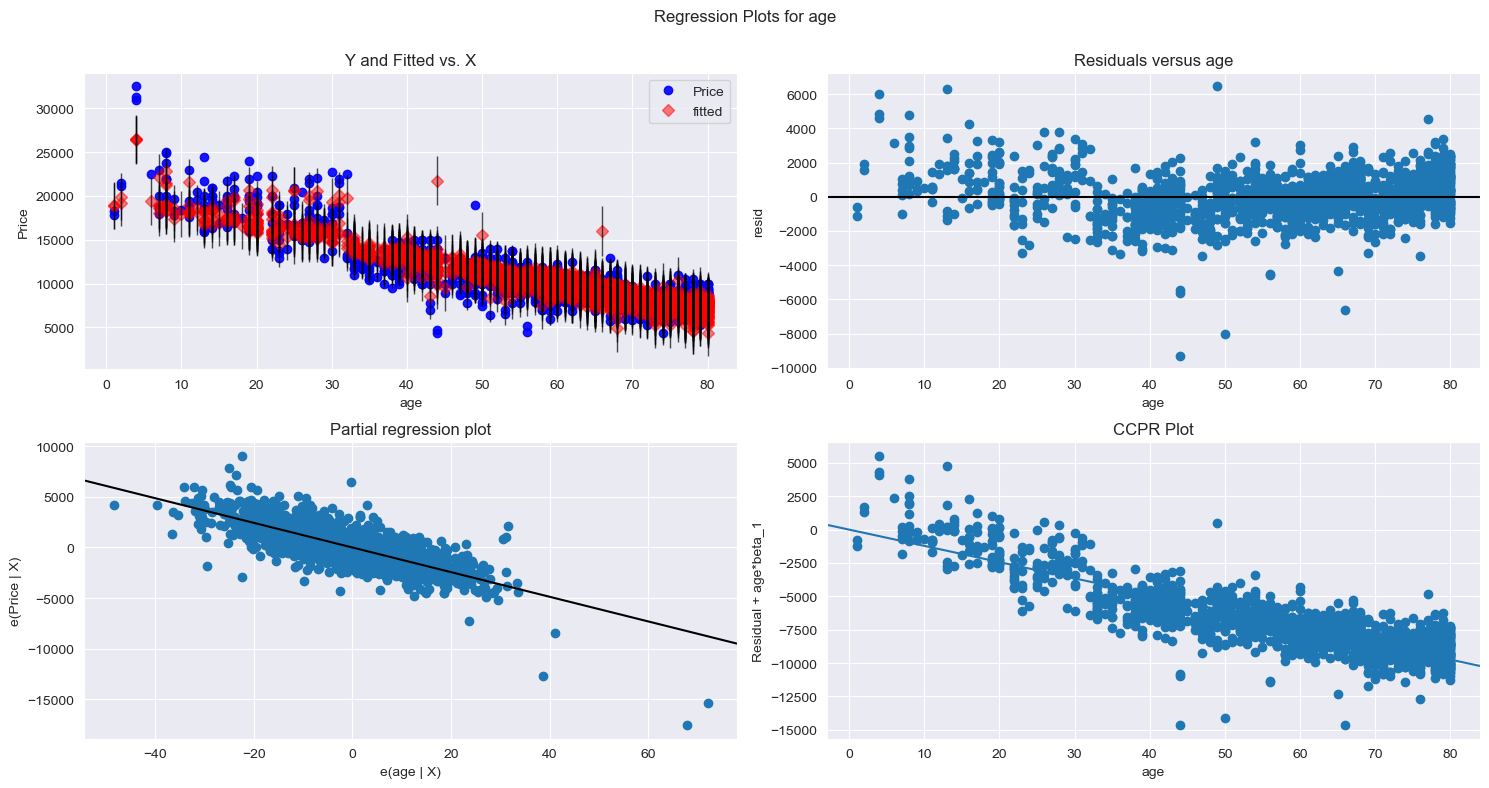

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


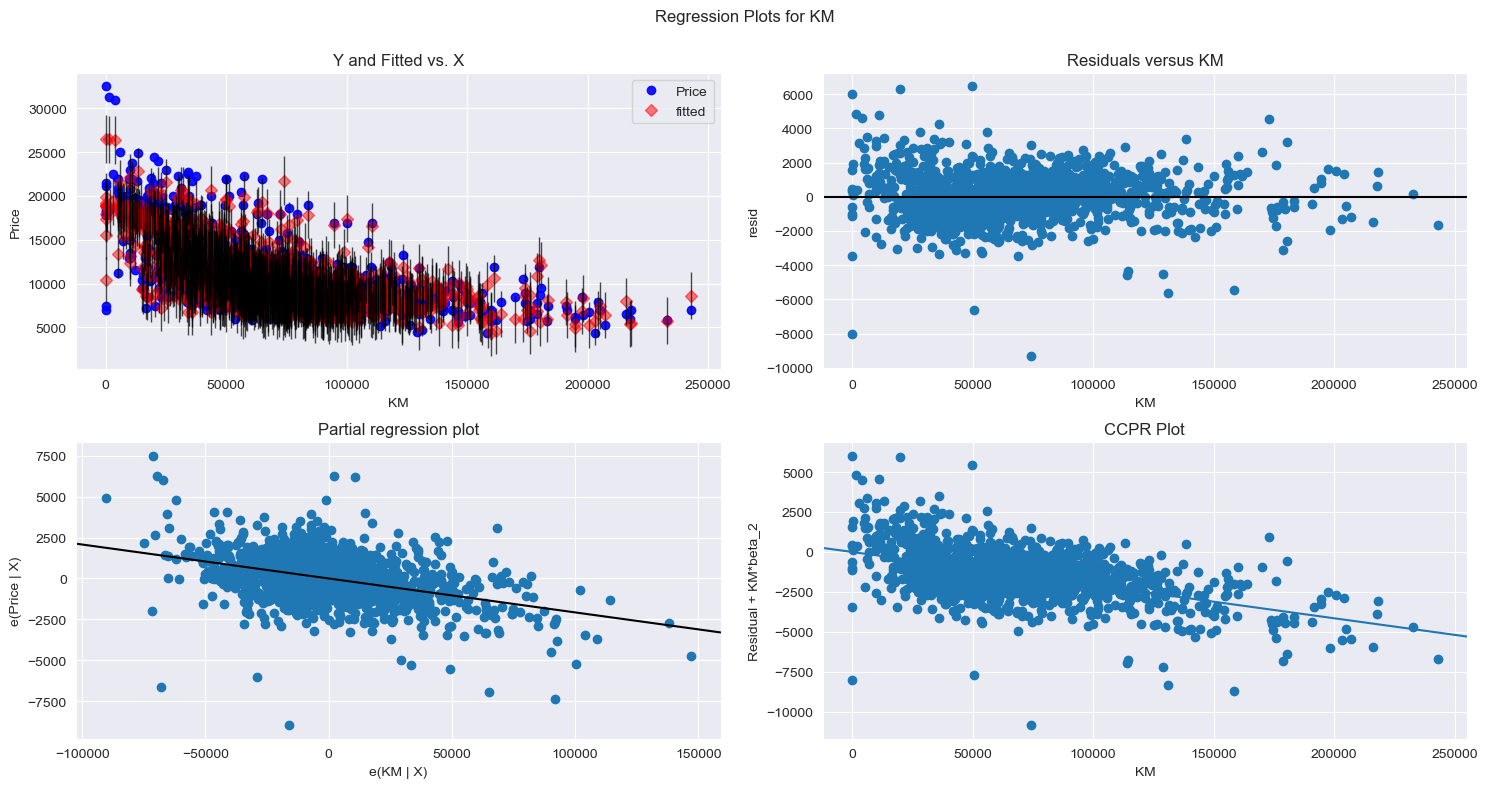

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


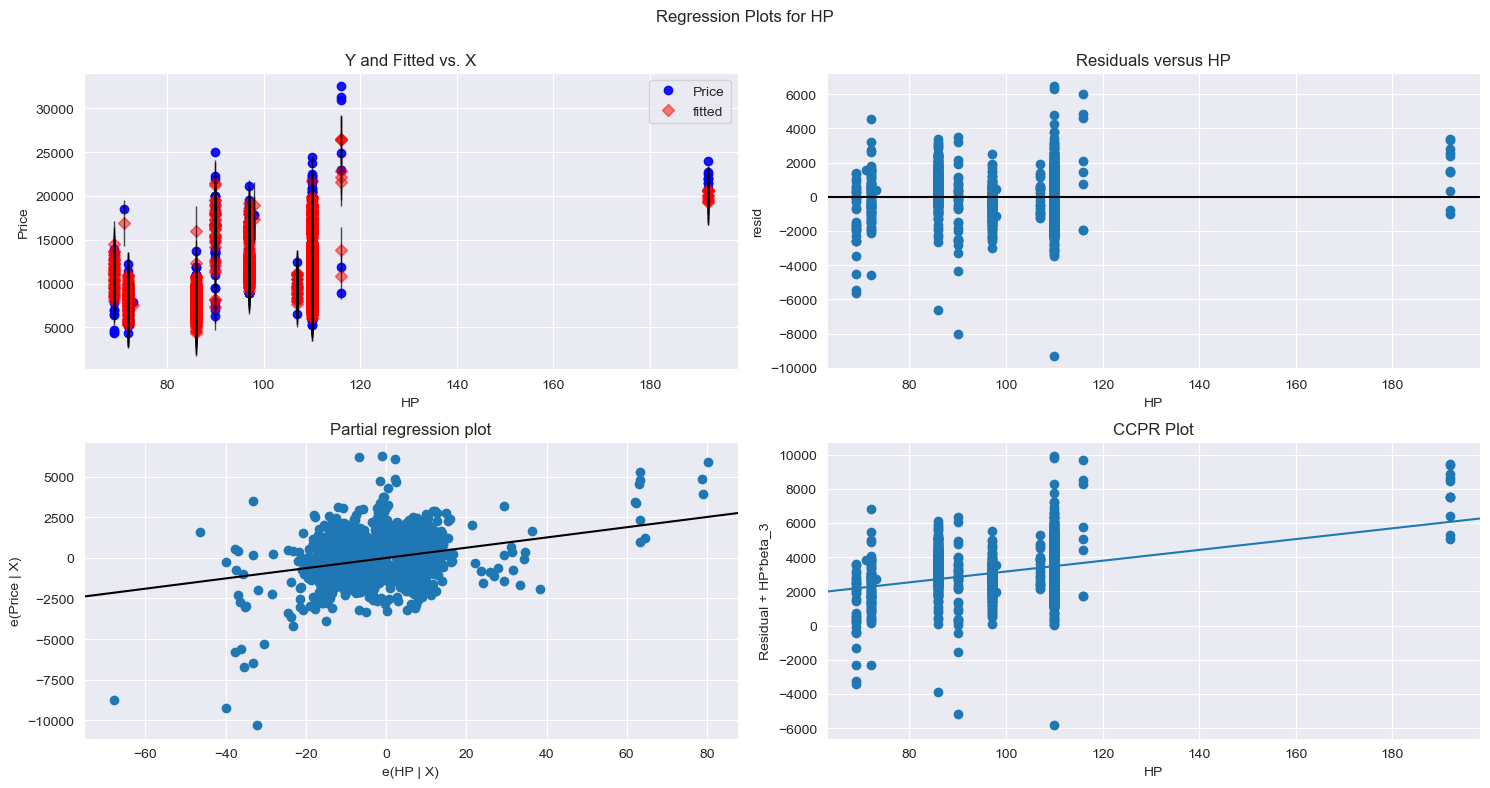

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


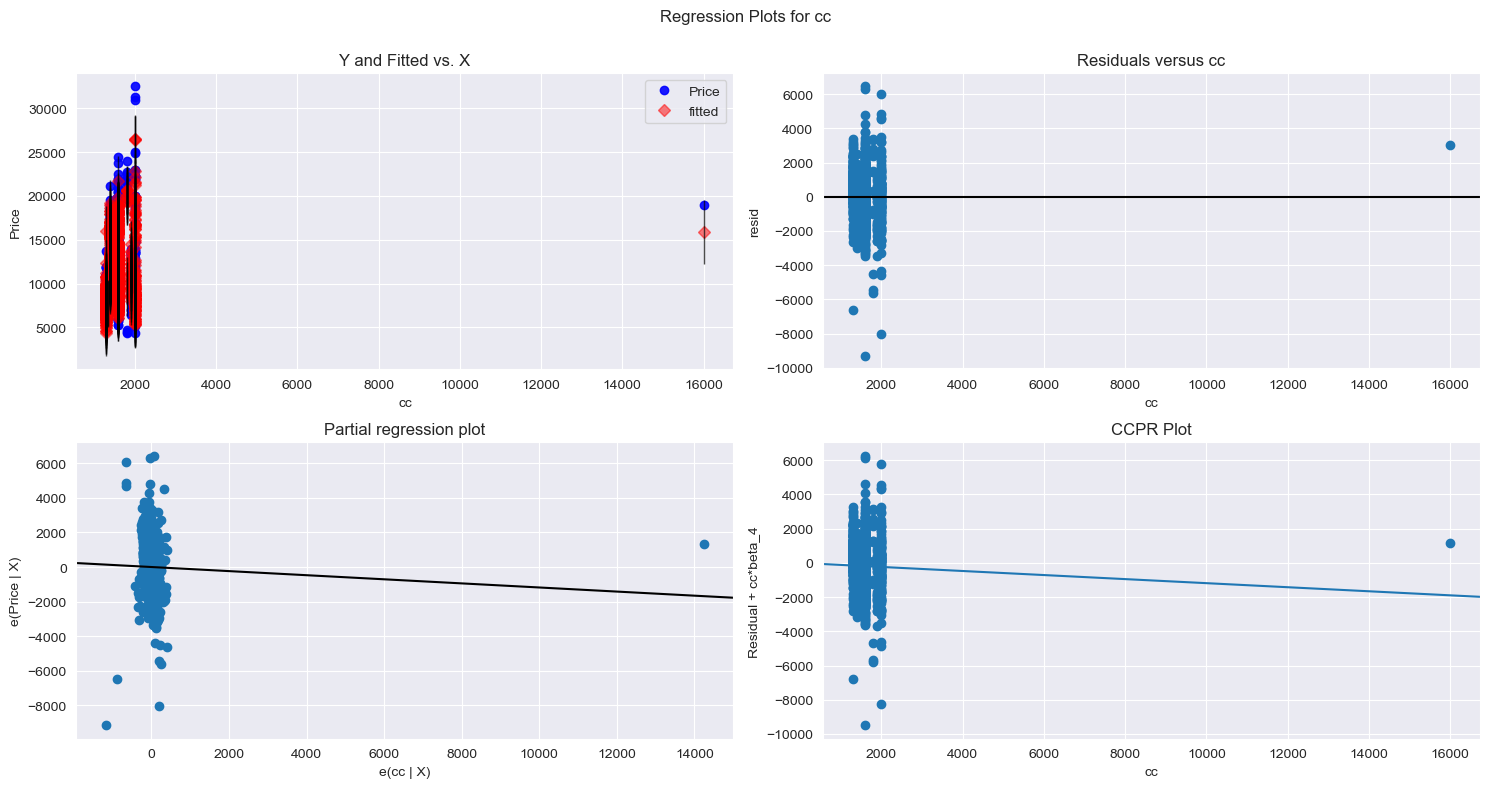

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


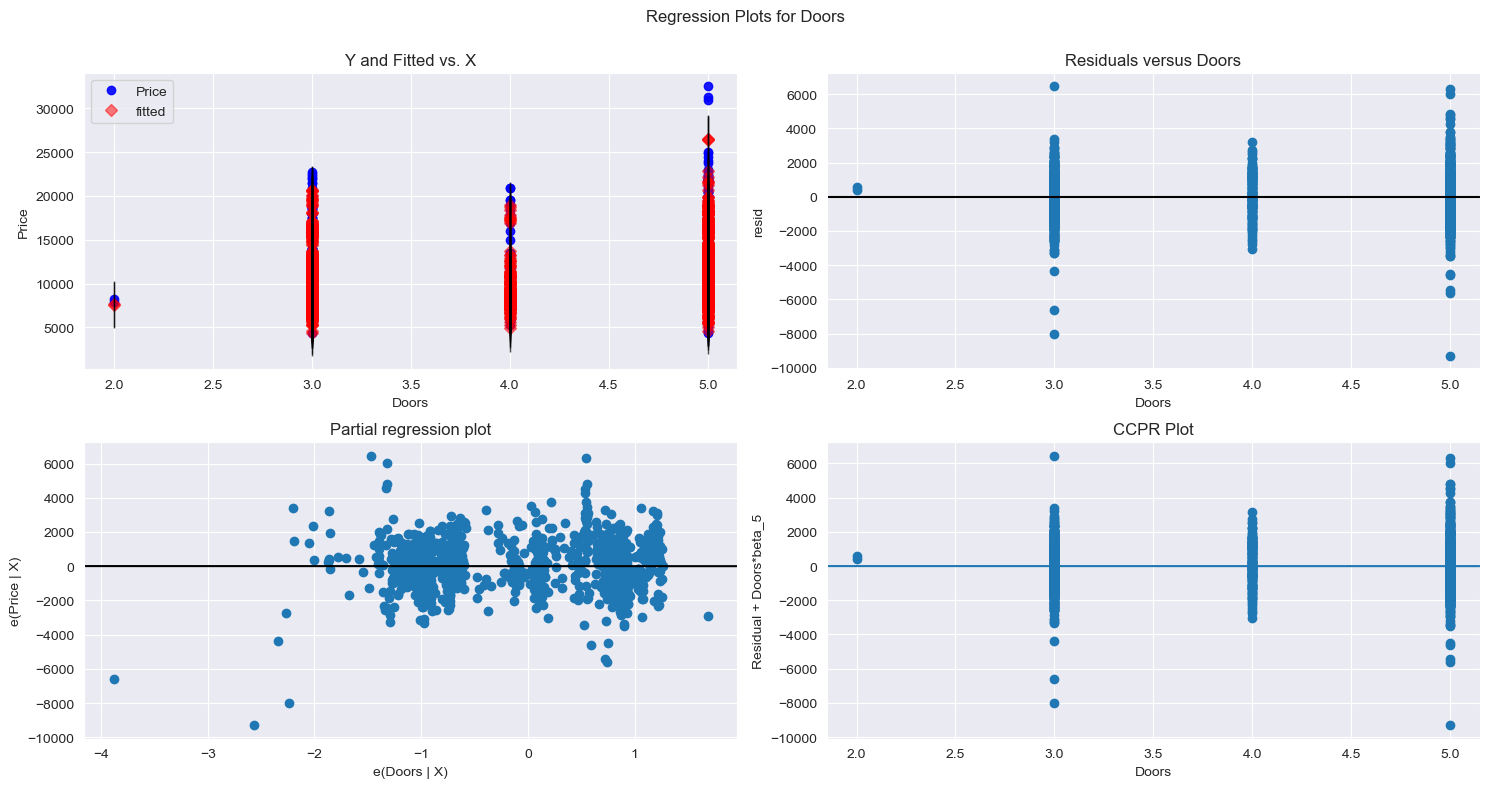

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


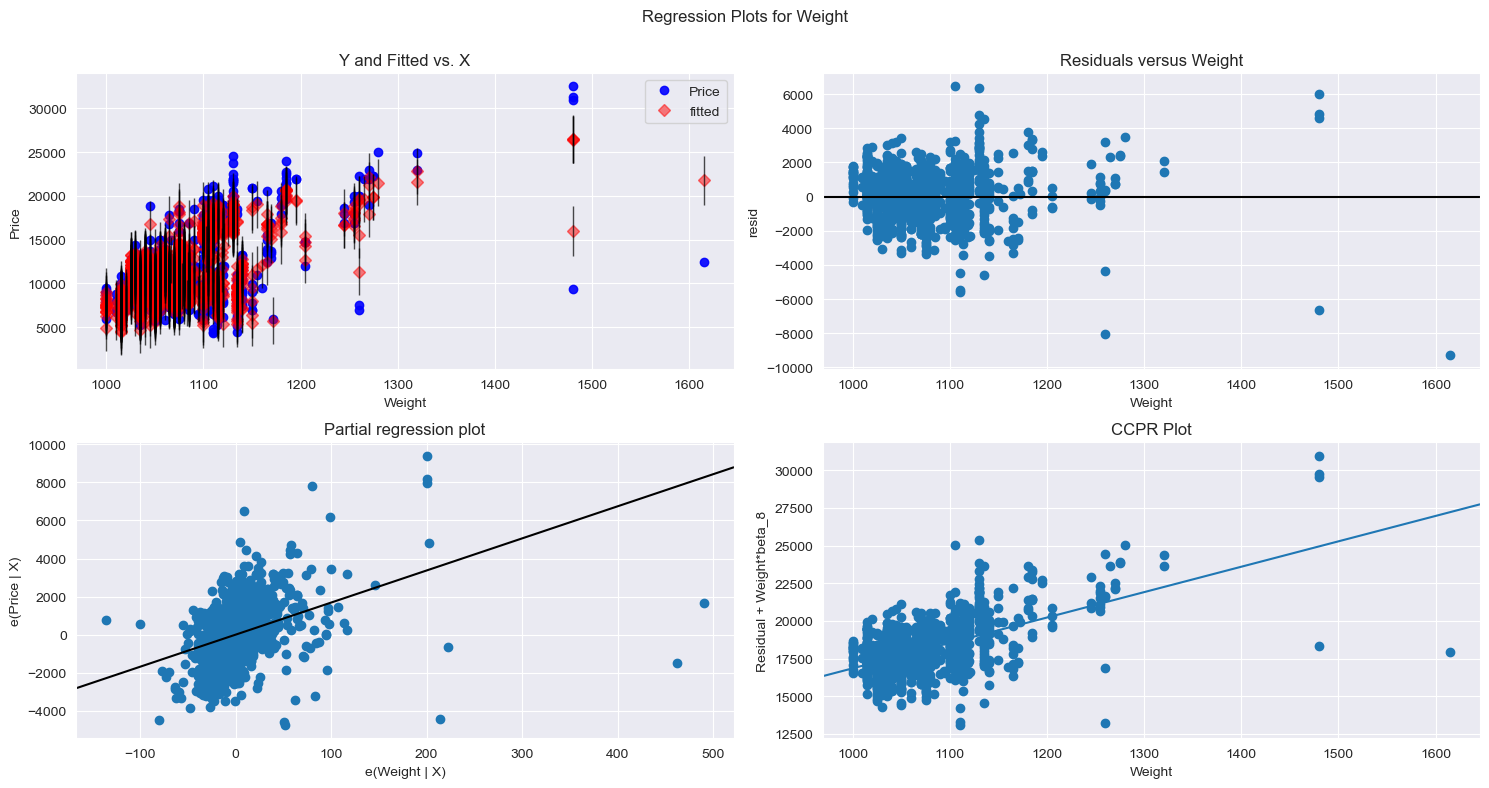

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1


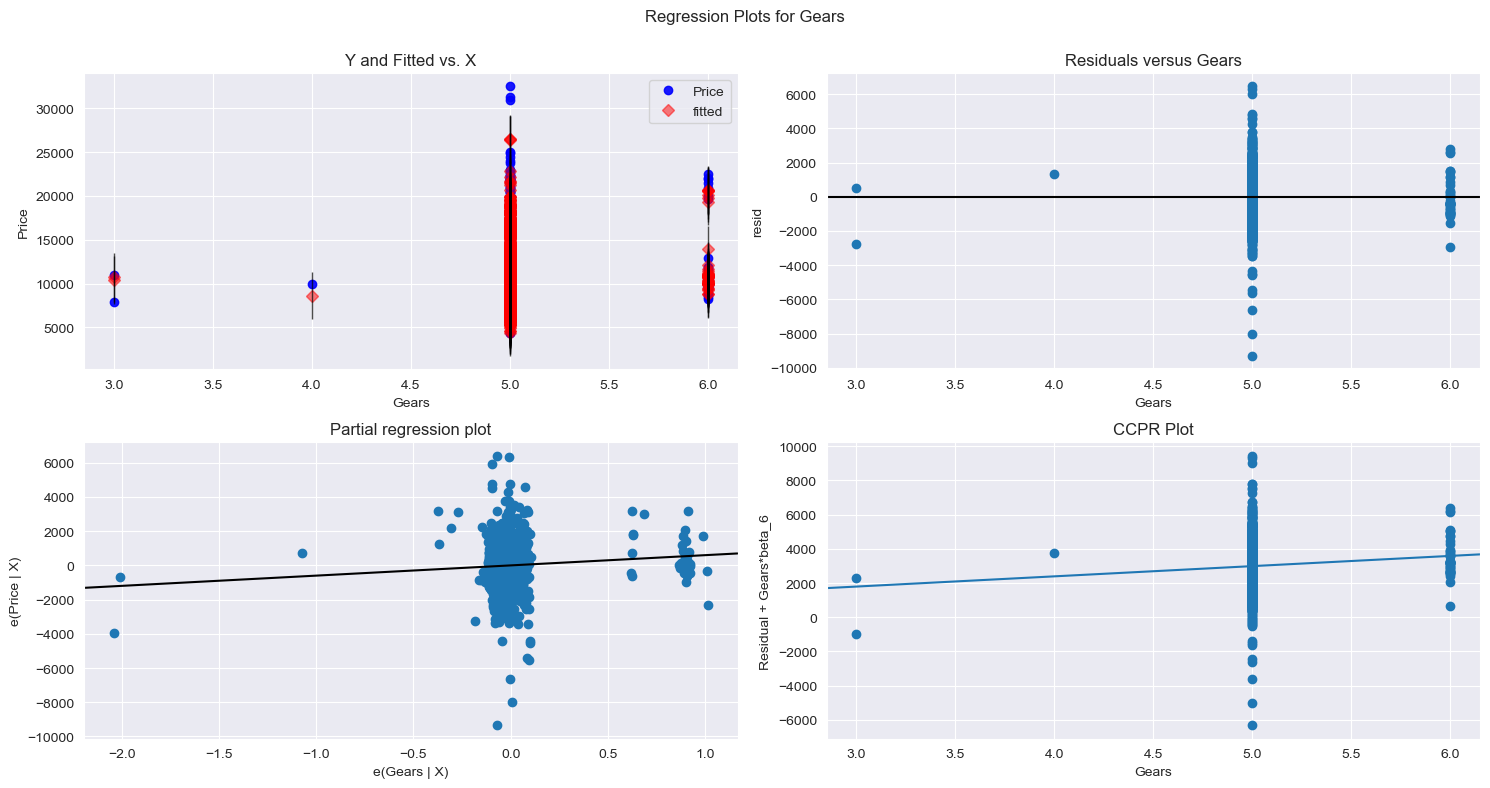

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


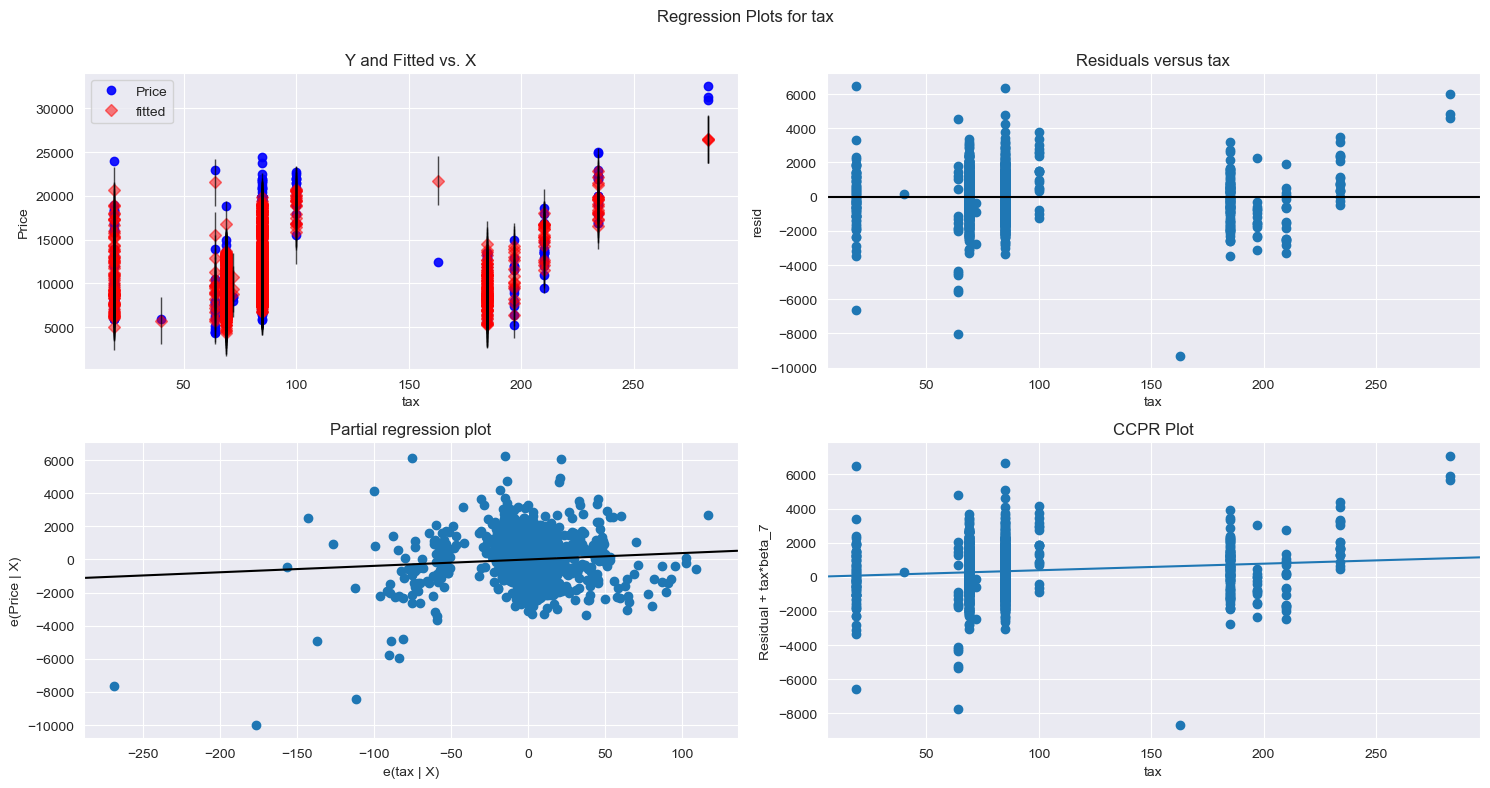

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [43]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [44]:
# Index and value of influencer where C>0.5

c.max(), c.argmax()

(78.7295058224984, 80)

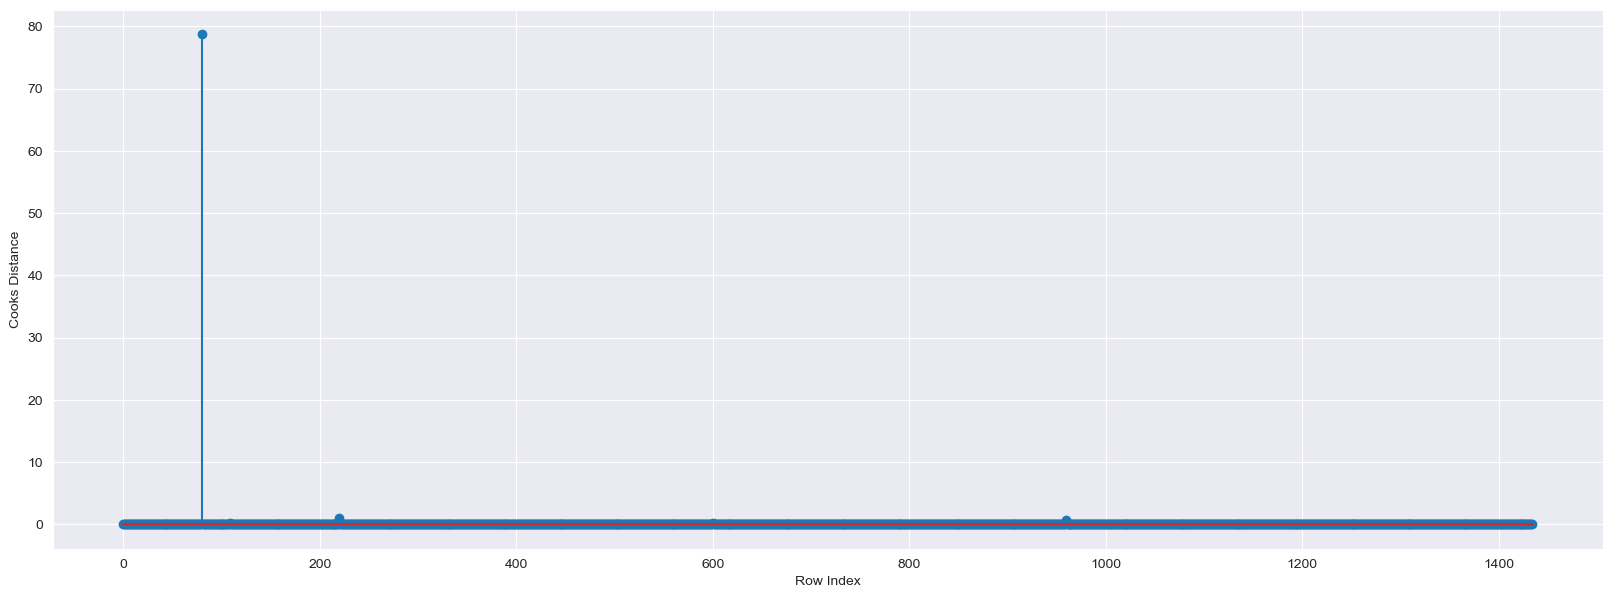

In [45]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# High Influence points¶

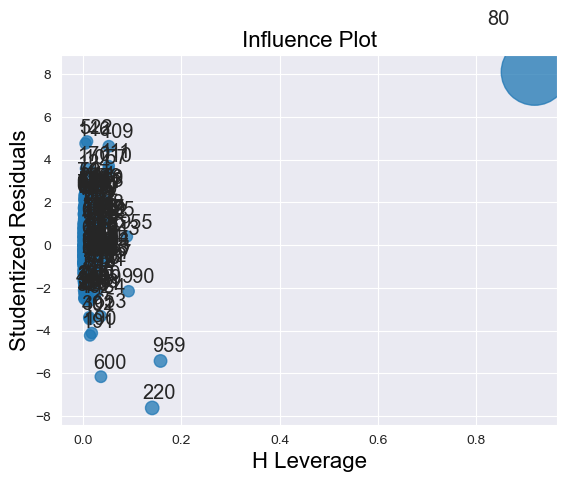

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

# model improving

In [47]:
# droping the two columns

df_new=df.drop(df.index[[80]],axis=0).reset_index().drop(['index'],axis=1)

df_new

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Build Our new Model

In [48]:
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=df_new).fit()
model1

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:19:05   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
(c,_)=model1.get_influence().cooks_distance

In [51]:
np.argmax(c) , np.max(c)

(219, 2.2253513655271004)

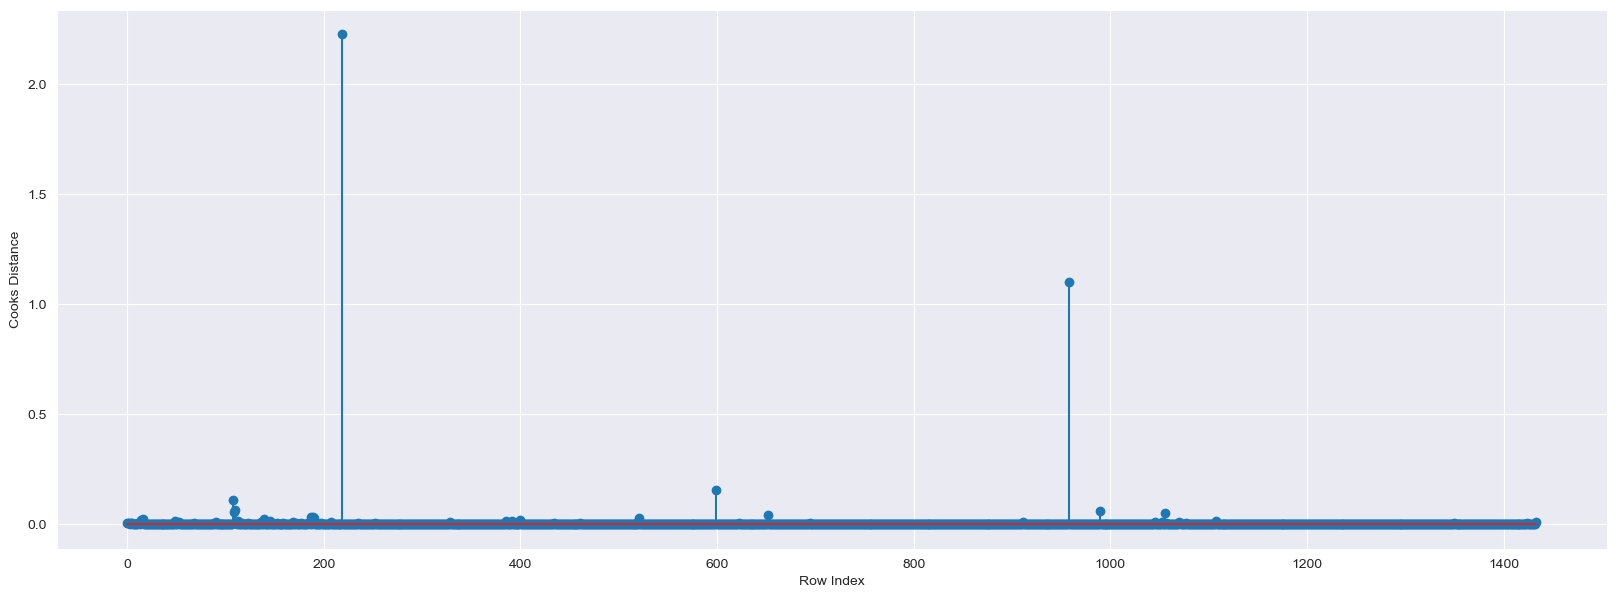

In [52]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# influencer plot

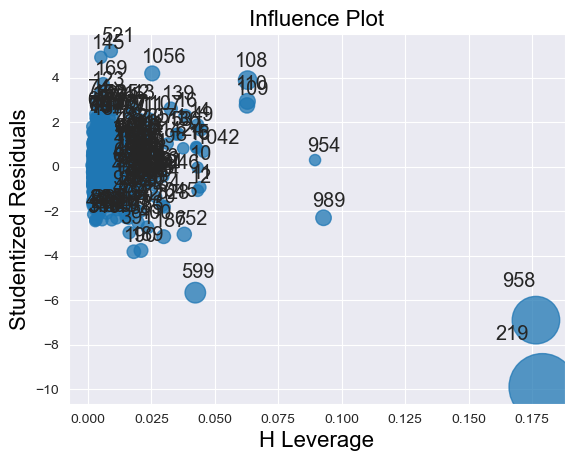

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

# model improving

In [57]:
# droping the two columns

df_new1=df_new.drop(df.index[[958,219]],axis=0)

df_new1

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [58]:
# Reset the index and re arrange the row values
new=df_new1.reset_index()

In [59]:
new1=new.drop(['index'],axis=1)
new1

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [60]:
# build the model on new data
model2=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=new1).fit()
model2

In [61]:
model2.params

Intercept   -14682.483085
age           -112.062887
KM              -0.016971
HP              36.558721
cc              -3.785187
Doors         -121.980785
Gears          466.601420
tax              5.175394
Weight          30.566656
dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:25:03   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#Again check for influencers
model_influence_V = model2.get_influence()
(c_V, _) = model_influence_V.cooks_distance

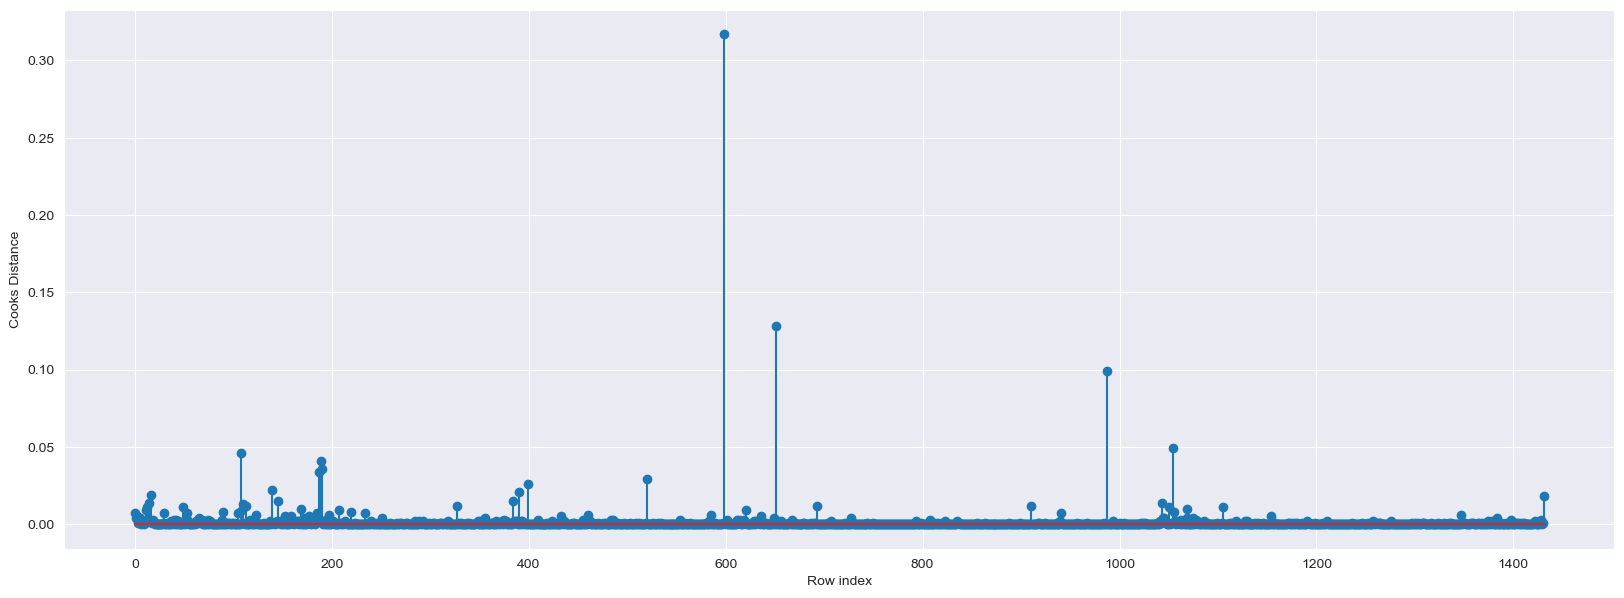

In [64]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [65]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(598, 0.31689035401435506)

# since the value is <1 , we can stop the diagnostic process and finalize the mode

In [66]:
#Check the accuracy of the mode
model2=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=new1).fit()
(model2.rsquared,model2.aic)

(0.8839684606741538, 24453.23573612724)

# Predicting new data

In [67]:
#New data for prediction
new_data=pd.DataFrame({"age":23,"KM":46986,'HP':90,"cc":2000,"Doors":3,"Gears":5,"tax":210,"Weight":1165},index=[1])

In [68]:
model2.predict(new_data)

1    16326.634426
dtype: float64